# Data Preprocessing for Machine Learning

### Objective of this Notebook

Welcome! This notebook is designed to serve as a comprehensive introduction to data preprocessing. We'll cover what data processing is, why it's essential in machine learning, and walk through many of the most commonly used data processing techniques.

My goal is to make this notebook a one-stop resource for beginners who want to build a solid foundation and become proficient in data processing.

#### Some Important Notes

I’d like to preface this by saying that I’m still learning myself. This notebook is both a learning resource for others and a learning journey for me. As such, I’m using it to teach myself through practice and documentation.

This notebook is part of a series that covers all aspects of the ML pipeline.

If you notice any mistakes, unclear explanations, or missing details, I’d greatly appreciate feedback or suggestions for improvement. Let’s learn together!

#### Prerequisites

Knowledge of basic Python (classes and objects) and NumPy, pandas, matplotlib, and seaborn will be useful here. As well as reading the previous EDA notebook I made,

#### Links to Resources I Used

Special thanks to all the creators/content that guided me in making this tutorial.

I will leave links to all the works I used for people who want to go further in-depth. 

- https://www.youtube.com/watch?v=i9R6XnxprPA&t=3040s
- https://medium.com/@heysan/understanding-and-handling-outliers-in-data-analysis-727a768650fe

#### Dataset we will be exploring 

We will use the house prices dataset for this notebook. Which can be found here

- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

### What is Data Preprocessing?

As established in the previous EDA notebook, EDA can uncover many issues that lie in the dataset we are working with (e.g., missing values, inconsistent formats, outliers, etc.). Data preprocessing is the process we use to handle these issues so that our dataset is the best fit for our model to be trained on. Resulting in a more accurate model better able to generalize to unseen data

#### Objective of Data Preprocessing

- Handling Missing Values

- Inconsistent data types

- Outlier identification

- Data Imbalance

With this out of the way, let's first discuss missing value handling. 

### Types of Missing Data

Missing values can come from an array of issues stemming from entry issues, system issues, etc. There are 3 types of missing values

1. Missing Completely at Random (MCAR)
    - The missingness of this kind of data is equally probable for all observations
    - ex): A survey participant accidentally skips a question and has no reason for it
    - This kind of missing data is ideal to have, because the handling of this data is the most straightforward
2. Missing at Random (MAR)
    - The missingness of a value is related to some other observed data
    - ex, Men are more likely to skip a mental health question than women (The missingness of the survey completed feature is tied to gender)
3. Missing Not at Random (MNAR)
   - The missingness of a value is directly related to missing values themselves
   - ex, people with higher incomes may be less likely to report their income

### Handling Missing Values

![](./images/missing_data_handling.png)
Image From: https://github.com/Aadi-stack/Machine-learning-part-handling-missing-data?tab=readme-ov-file

So, as we can see from above, we have many options in dealing with NA values. Let's dive into these a bit more. For now, we will only discuss missing value handling for Numeric and categorical values.

1. Case Deletion: Deleting rows or columns containing missing values
    - This is often not the best option as we lose a lot of valuable information, and may introduce bias if the missingness is not MCAR
    - This is best for when the data is MCAR and the amount of missing data is less than 5%
2. Direct Imputation: Filling in data using statistics (mean, median, mode, regression, etc) or Machine learning based (KNN, Neural network, etc.)
    - Best for a small amount of missing values, and low variability
3. Model-Based Imputation: Use a model like KNN, regression, or random forest to predict missing values
    - Better for features containing a high amount of missing values and having complex relationships in the dataset
    - Can cause overfitting


Now with this out of the way, let's see this in practice.

In [1]:
# Loading The libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox

In [2]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head() # printing the first 5 rows in the df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_val = df.isna().sum() 

print(missing_val[missing_val > 0]) # Prints all features with atleast 1 missing value

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


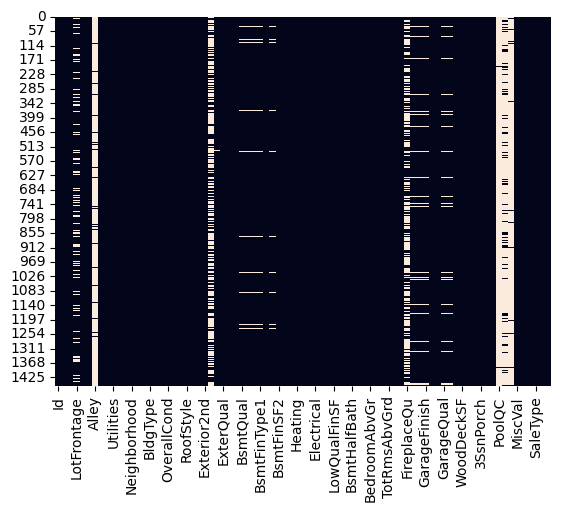

In [4]:
# A heatmap visualization of all missing values
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [5]:
# Creating a df that returns the percentage of missing values in the dataset
missing_val_percent = df.isna().mean().sort_values(ascending=False)*100
print(missing_val_percent[missing_val_percent > 0])


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Case Deletion

1. Deleting columns with missing data
2. Deleting rows with missing data

In [7]:
df_column_delete = df.copy()
df_column_delete = df_column_delete.drop(['Alley'], axis = 1)

df_row_delete = df.copy()
df_row_delete = df_row_delete.dropna(axis = 1)

### MCAR Simulation


Now, as we discussed before, we must determine whether there is a significant difference between the 2 groups. We can use this using the T-Test Calculation.

To illustrate MNAR, we can perform a t-test to see if there's any significant difference in the mean of a feature between the 2 groups (original and missing values). If the p-value < 0.05. The means are different, and there is a significant statistical change 

In [8]:
# Example from https://www.youtube.com/watch?v=i9R6XnxprPA&t=713s

df_copy = df.copy()

# Nows lets take a random sample of 'Gr Liv Area' Values to simulate MCAR

np.random.seed(42)
mcar_mask = np.random.rand(len(df_copy)) < 0.05
df_copy.loc[mcar_mask,'GrLivArea'] = np.nan

print("\nData with MCAR simulated in 'GrLivArea'")
print(df_copy['GrLivArea'].isnull().sum())

df_copy_stats = pd.concat([df.describe()['GrLivArea'],df_copy.describe()['GrLivArea']], axis =1)
df_copy_stats.columns = ['Original','MCAR simulated']

df_copy_stats['Change'] = df_copy_stats['MCAR simulated'] - df_copy_stats['Original']
df_copy_stats['Change %'] = (df_copy_stats['Change']/ df_copy_stats['Original'])*100

print(df_copy_stats)

from scipy.stats import ttest_ind

original_values = df['GrLivArea'].dropna()
mcar_sim_values = df_copy['GrLivArea'].dropna()

t_stat, p_value = ttest_ind(original_values,mcar_sim_values,equal_var=False, nan_policy='omit')
print("\nStatistical significance of the change in 'GrLivArea'")
print(f"T-stat: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print('The change is statiscally significant at 5% level')
else:
    print('The change is not statiscally significant')


Data with MCAR simulated in 'GrLivArea'
81
          Original  MCAR simulated     Change  Change %
count  1460.000000     1379.000000 -81.000000 -5.547945
mean   1515.463699     1515.146483  -0.317216 -0.020932
std     525.480383      529.675059   4.194675  0.798255
min     334.000000      334.000000   0.000000  0.000000
25%    1129.500000     1128.000000  -1.500000 -0.132802
50%    1464.000000     1458.000000  -6.000000 -0.409836
75%    1776.750000     1776.000000  -0.750000 -0.042212
max    5642.000000     5642.000000   0.000000  0.000000

Statistical significance of the change in 'GrLivArea'
T-stat: 0.0160
P-value: 9.8723e-01
The change is not statiscally significant


### Direct Imputation

1. Imputing with mean/median/mode(most_frequent) (using sklearns SimpleImputer
2. Constant imputation: Fills missing values by replacing all missing data with a fixed value like 0 or 'None'

#### Numeric Imputation

In [9]:
df_mean = df.select_dtypes(include=['number'])
df_median = df.select_dtypes(include=['number'])
df_most_frequent = df.select_dtypes(include =['object'])
df_constant = df.copy()

In [10]:
# Mean imputation (Numeric)
imputer = SimpleImputer(strategy='mean')

imputed = imputer.fit_transform(df_mean)
df_mean_imputed = pd.DataFrame(imputed, columns = df_mean.columns)
df_mean_imputed.isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [11]:
# Median imputation (Numeric)
imputer = SimpleImputer(strategy='median')
imputed = imputer.fit_transform(df_median)
df_median_imputed = pd.DataFrame(imputed, columns = df_median.columns)
df_median_imputed.isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [12]:
# Mode imputation (Categorical)

imputer = SimpleImputer(strategy='most_frequent')
imputed = imputer.fit_transform(df_most_frequent)
df_most_frequent_imputed = pd.DataFrame(imputed,columns = df_most_frequent.columns)
df_most_frequent_imputed.isna().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [13]:
# Constant Imputation (Numerical and Categorical)

df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

imputer_num = SimpleImputer(strategy='constant', fill_value=0)
imputer_cat = SimpleImputer(strategy='constant', fill_value='None')

imputed_num = imputer_num.fit_transform(df_num)
imputed_cat = imputer_cat.fit_transform(df_cat)

constant_imputed_num = pd.DataFrame(imputed_num, columns = df_num.columns)
constant_imputed_cat = pd.DataFrame(imputed_cat, columns = df_cat.columns)

In [14]:
constant_imputed_num.isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [15]:
constant_imputed_cat.isna().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [16]:
num_col = 'LotFrontage'
original_stats = df[num_col].describe()
mean_imputed_stats = df_mean_imputed[num_col].describe()
median_imputed_stats = df_median_imputed[num_col].describe()
constant_imputed_stats = constant_imputed_num[num_col].describe()

# Combine into a single DataFrame
stats_comp = pd.concat([original_stats,
                        mean_imputed_stats,
                        median_imputed_stats,
                        constant_imputed_stats],
                       axis=1,
                       keys=['Original', 'Mean Imputed', 'Median Imputed', 'Constant Imputed'])

print("Comparison of summary statistics of:", num_col)
stats_comp

Comparison of summary statistics of: LotFrontage


,Original,Mean Imputed,Median Imputed,Constant Imputed
count,1201.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,70.049958,69.863699,57.623288
std,24.284752,22.024023,22.027677,34.664304
min,21.000000,21.000000,21.000000,0.000000
25%,59.000000,60.000000,60.000000,42.000000
50%,69.000000,70.049958,69.000000,63.000000
75%,80.000000,79.000000,79.000000,79.000000
max,313.000000,313.000000,313.000000,313.000000


So from first glance, the mean and median method of imputation does not seem to affect the mean much, where as for the constant method of imputation drops signifcantly

Lets graph these changes to get a better understanding of whats going on 

In [17]:
def plotting_imputed(imputed_df, col):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"{col} before imputation")
    
    plt.subplot(1, 2, 2)
    sns.histplot(imputed_df[col], kde=True, color='orange')
    plt.title(f"{col} after imputation")
    
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


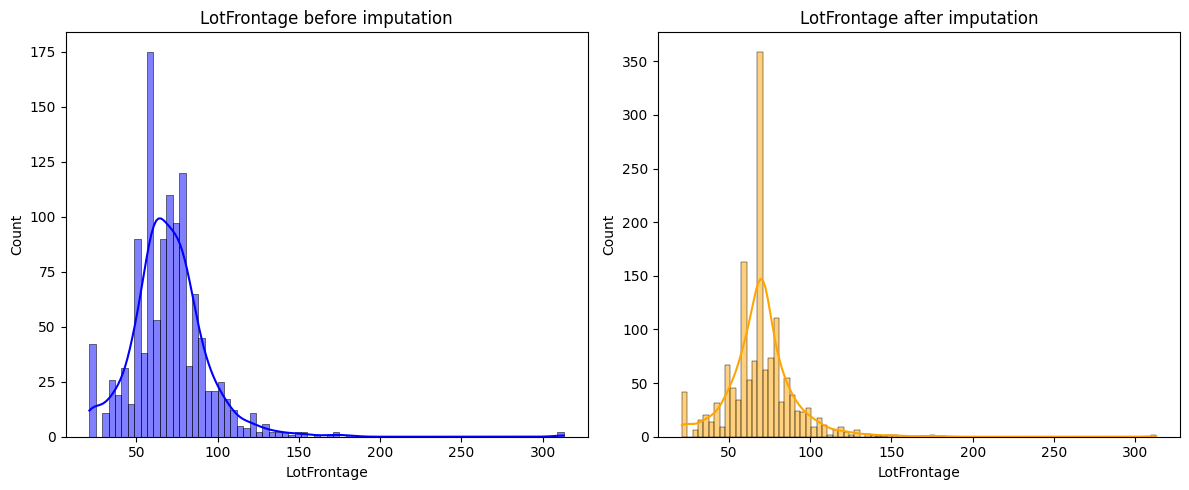

In [18]:
plotting_imputed(df_mean_imputed,'LotFrontage')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


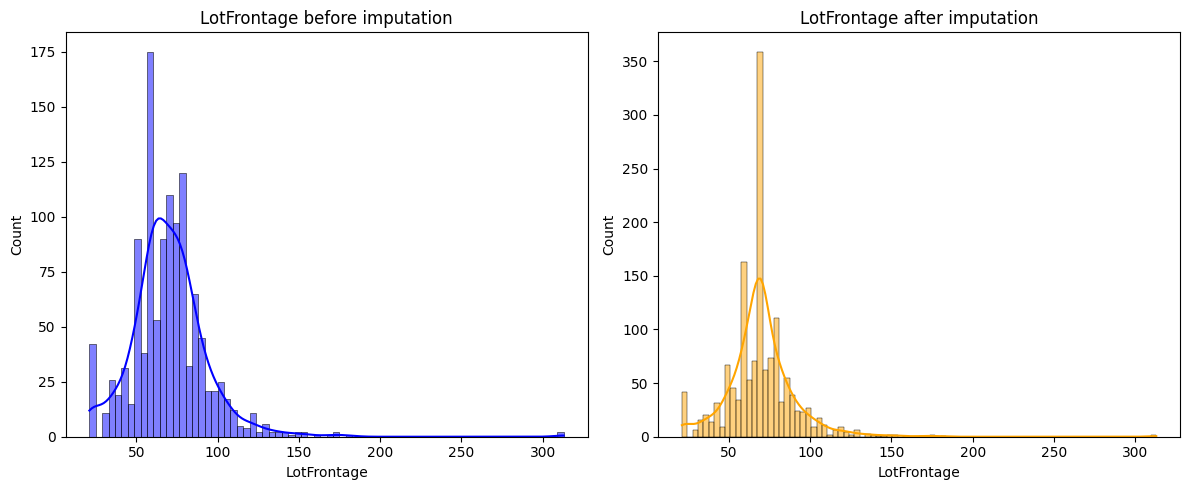

In [19]:
plotting_imputed(df_median_imputed, 'LotFrontage')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


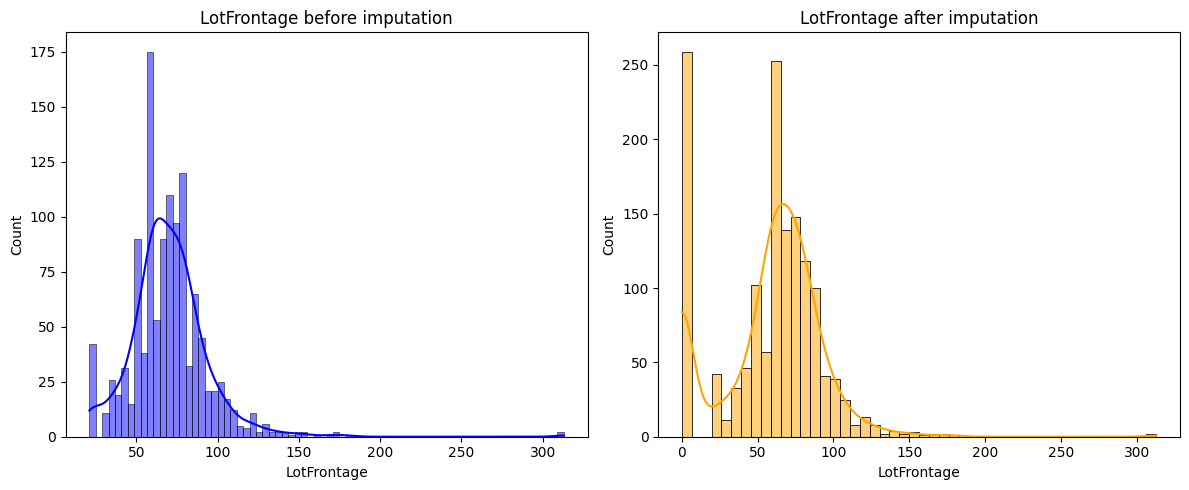

In [20]:
plotting_imputed(constant_imputed_num,'LotFrontage')

So now we can get a better visual as to why the mean, min, and 25% quartile changes so much with a constant imputation. Since we filled all our missing values for numeric columns to be 0, we get a large number of 0 values in the dataset. This creates an artificial spike, creating a cluster that doesn't actually exist.

Let's create a function to represent the statistical change

In [21]:
# Code from https://www.youtube.com/watch?v=i9R6XnxprPA&t=713s

num_col = 'LotFrontage'
original_values = df[num_col].dropna()

def print_statisical_significance(imputation_method,original_values,imputed_values):
    t_stat,p_value = ttest_ind(original_values,imputed_values,nan_policy='omit')
    print(f"{num_col} - {imputation_method} Imputation p - value: {p_value:.4e}")

    if p_value < 0.05:
        print(f'The change is statiscally significant at 5% level. Suggesting {imputation_method} has signifcantly altered the distribution')
    else:
        print(f'The change is not statiscally significant')

print('\nStatiscal Significance for Mean Imputation for (Numerical Columns)')
imputed_values = df_mean_imputed[num_col]
print_statisical_significance('Mean',original_values,imputed_values)

print('\nStatiscal Significance for Median Imputation for (Numerical Columns)')
imputed_values = df_median_imputed[num_col]
print_statisical_significance('Median',original_values,imputed_values)

print('\nStatiscal Significance for Constant Imputation for (Numerical Columns)')
imputed_values = constant_imputed_num[num_col]
print_statisical_significance('Constant',original_values,imputed_values)


Statiscal Significance for Mean Imputation for (Numerical Columns)
LotFrontage - Mean Imputation p - value: 1.0000e+00
The change is not statiscally significant

Statiscal Significance for Median Imputation for (Numerical Columns)
LotFrontage - Median Imputation p - value: 8.3586e-01
The change is not statiscally significant

Statiscal Significance for Constant Imputation for (Numerical Columns)
LotFrontage - Constant Imputation p - value: 3.1006e-25
The change is statiscally significant at 5% level. Suggesting Constant has signifcantly altered the distribution


### Model Based 

Here will we impute using models regression models and probabilites (Bayesian models)

In [22]:
from sklearn.linear_model import LinearRegression

# Make a copy to avoid changing the original
df_linear_imputation = df.copy()

# Define the column you want to impute
num_col = 'LotFrontage'

# Choose predictors (should NOT include the column you want to impute)
predictors = ['OverallQual', 'YearBuilt', 'LotArea']

# Split into training and missing sets
train = df_linear_imputation[df_linear_imputation[num_col].notnull()]
pred = df_linear_imputation[df_linear_imputation[num_col].isnull()]

# Prepare training data
X_train = train[predictors]
y_train = train[num_col]

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_pred = pred[predictors]
predicted_vals = model.predict(X_pred)

# Fill back into the dataset
df_linear_imputation.loc[df_linear_imputation[num_col].isnull(), num_col] = predicted_vals



#### KNN Imputation

works by finding the nearest samples to the missing data, and averages out the k number of neighbours.

- So for a given missing data point
- KNN finds the k nearest neighbours of the missing data point (those with the closest euclidean distance)
- Sums their values (mean for numerical, mode for categorical)
- Fills in this missing value 

In [23]:
from sklearn.impute import KNNImputer

df_knn_imputation = df.select_dtypes(include=['number'])

imputer = KNNImputer(n_neighbors=2)

imputed = imputer.fit_transform(df_knn_imputation)

knn_imputed_df = pd.DataFrame(imputed, columns = df_knn_imputation.columns)
knn_imputed_df.isna().sum()


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

#### Iterative Imputer

A much more computationally expensive solution, iterative imputer fills all missing values, by modeling each columns as a regression problem and iteratively does this for each missing value

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_iterative_imputation = df.select_dtypes(include = ['number'])

imputer = IterativeImputer()

iterative_imputed = imputer.fit_transform(df_iterative_imputation)

iterative_imputed_df = pd.DataFrame(iterative_imputed, columns = df_iterative_imputation.columns)
iterative_imputed_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [25]:
num_col = 'LotFrontage'
original_stats = df[num_col].describe()
linear_imputed_stats = df_linear_imputation[num_col].describe()
knn_imputed_stats = knn_imputed_df[num_col].describe()
iterative_imputed_stats = iterative_imputed_df[num_col].describe()
# Combine into a single DataFrame
stats_comp = pd.concat([original_stats,
                        linear_imputed_stats,
                        knn_imputed_stats,
                        iterative_imputed_stats],
                       axis=1,
                       keys=['Original', 'Linear Imputed', 'KNN Imputed', 'Iterative Imputed'])

print("Comparison of summary statistics of:", num_col)
stats_comp

Comparison of summary statistics of: LotFrontage


,Original,Linear Imputed,KNN Imputed,Iterative Imputed
count,1201.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,70.657242,70.742808,70.642871
std,24.284752,23.568887,24.215981,23.315364
min,21.000000,21.000000,21.000000,21.000000
25%,59.000000,60.000000,60.000000,60.000000
50%,69.000000,70.000000,70.000000,70.000000
75%,80.000000,80.000000,80.500000,80.000000
max,313.000000,313.000000,313.000000,313.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


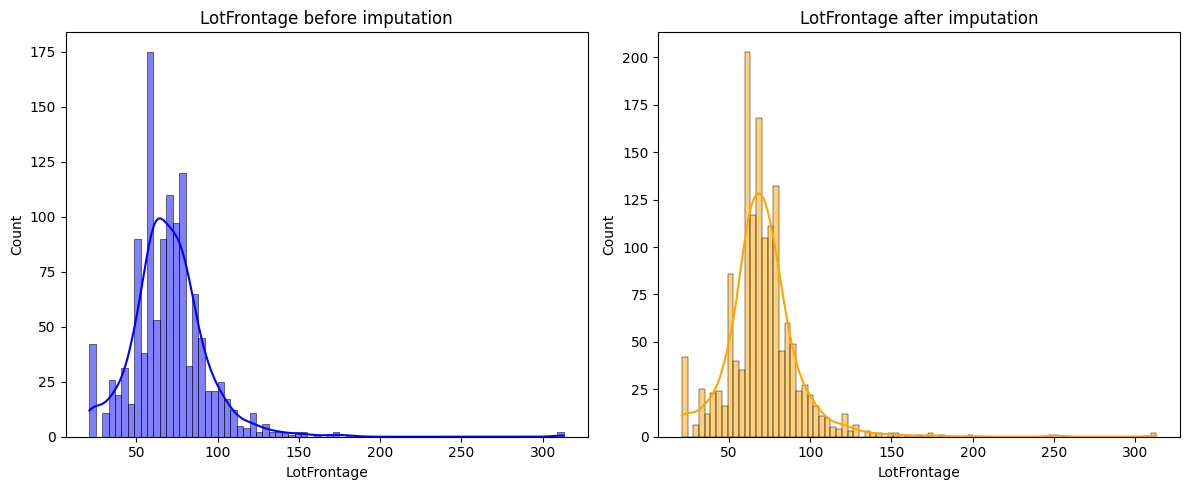

In [26]:
plotting_imputed(df_linear_imputation,'LotFrontage')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


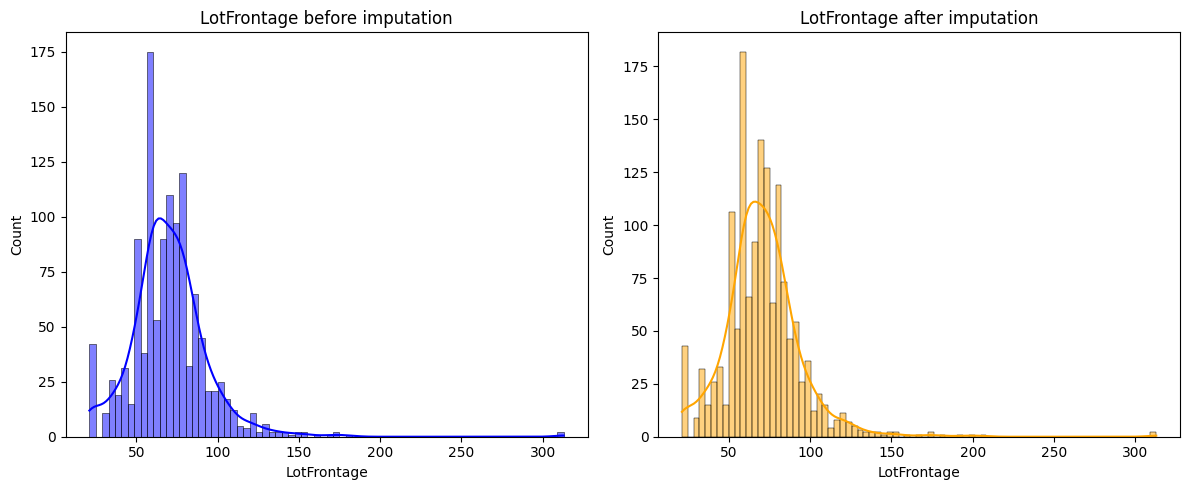

In [27]:
plotting_imputed(knn_imputed_df,'LotFrontage')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


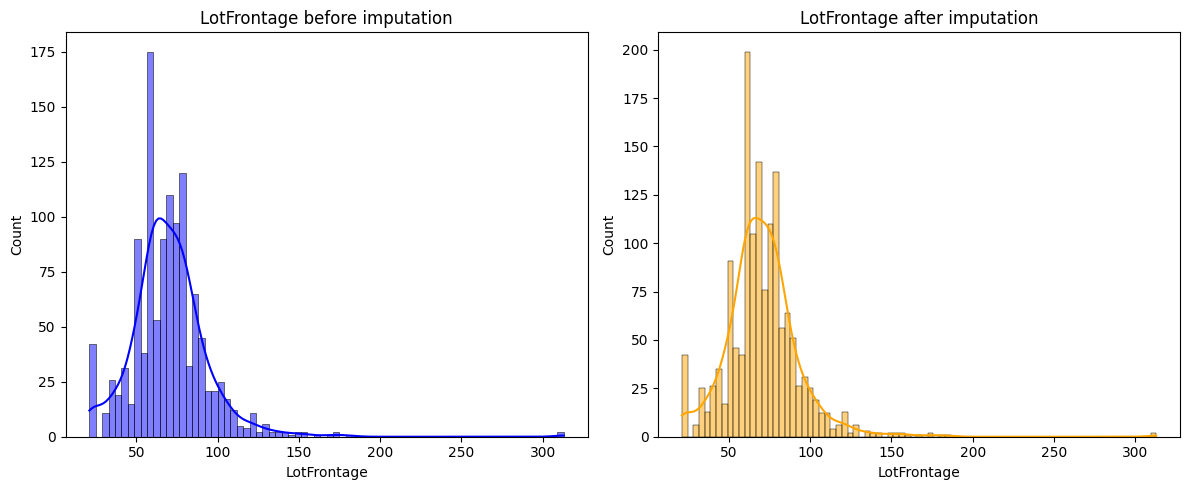

In [28]:
plotting_imputed(iterative_imputed_df,'LotFrontage')

In [29]:
print('\nStatiscal Significance for Linear Imputation for (Numerical Columns)')
imputed_values = df_linear_imputation[num_col]
print_statisical_significance('Linear Regression',original_values,imputed_values)

print('\nStatiscal Significance for Median Imputation for (Numerical Columns)')
imputed_values = knn_imputed_df[num_col]
print_statisical_significance('KNNImputer',original_values,imputed_values)

print('\nStatiscal Significance for Constant Imputation for (Numerical Columns)')
imputed_values = iterative_imputed_df[num_col]
print_statisical_significance('IterativeImputer',original_values,imputed_values)


Statiscal Significance for Linear Imputation for (Numerical Columns)
LotFrontage - Linear Regression Imputation p - value: 5.1420e-01
The change is not statiscally significant

Statiscal Significance for Median Imputation for (Numerical Columns)
LotFrontage - KNNImputer Imputation p - value: 4.6331e-01
The change is not statiscally significant

Statiscal Significance for Constant Imputation for (Numerical Columns)
LotFrontage - IterativeImputer Imputation p - value: 5.2181e-01
The change is not statiscally significant


## Detecting and Handling Outliers

As established in eda notebook, outliers are data points that largely differ from the rest of the dataset. Outliers can lead to our models producing inaccurate results

### Traditional Outlier Detection
We can view outliers in 
1. scatterplots 
2. boxplots (use IQR)
3. Z-score (measures how many standard deviations a data point is from the mean, Z > 3 and Z < -3 being often considered outliers)

### Advanced Outlier Detection

1. K-Means: Identifies points that are from the center of the cluster (centroids)
    - It is not ideal when data doesn't form clear clusters with varying density
2. Density-Based Scan (DBSCAN): Detects points that are close together, with any points outside these regions labelled as outsiders
    - Ideal for detecting arbitrary cluster shapes
3. Isolation Forest: Identifies outliers by isolating them with fewer splits in decision trees
4. Local Outlier Factor (LOF): Detects the density of a point with its neighbours, with lower densities being labelled as outliers

### Handling Outliers

1. Remove them completely
2. Impute (Statistical, model-based)
3. Transform (Log Transform, Square root transform, etc.)

Note that removing outliers is not always the best option. For some datasets, outliers are expected, such as in finance (given a dataset of all employees in a company, the CEO's salary would be an outlier, but still provides valuable information). We generally remove outliers for clear errors (A house that was sold for 100000000 and has a square footage of 2300ft)

Now let's see this in action.

In [30]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

#### Traditional Outlier Visualization

In [31]:
def traditional_outlier_plotting(df, feature1,feature2):
    
    features = [feature1,feature2]
    
    iqr_outliers = get_IQR(df,features)
    zscore_outliers = get_z_score(df,features, z_threshold=3.0)

    plt.figure(figsize=(12,8))
        
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[feature1], y=df[feature2], label='Data')
    sns.scatterplot(x=iqr_outliers[0][feature1], y=iqr_outliers[1][feature2],
        color='darkorange', label='IQR Outliers')
    plt.title(f'{feature1} vs {feature2} IQR Outliers')
    plt.legend()

        
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[feature1], y=df[feature2], label='Data')
    sns.scatterplot(x=zscore_outliers[0][feature1], y=zscore_outliers[1][feature2],
        color='red', label='Z_score Outliers')
    plt.title(f'{feature1} vs {feature2} Z_score Outliers')
    plt.legend()
    
    # Boxplots for each feature
    plt.figure(figsize=(12, 4 * len(features)))
    for i, feature in enumerate(features, start=1):
        plt.subplot(len(features), 1, i)
        sns.boxplot(x=df[feature])
        plt.title(f"Box plot of {feature}")

    plt.tight_layout()
    plt.show()

def get_IQR(df,features):
    outliers = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_iqr = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers.append(outliers_iqr)
    return outliers


def get_z_score(df,features, z_threshold):
    outliers = []
    for feature in features:
        z_score = (df[feature] - df[feature].mean()) / df[feature].std()
        outliers_z = df[np.abs(z_score) > z_threshold]
        outliers.append(outliers_z)
    return outliers

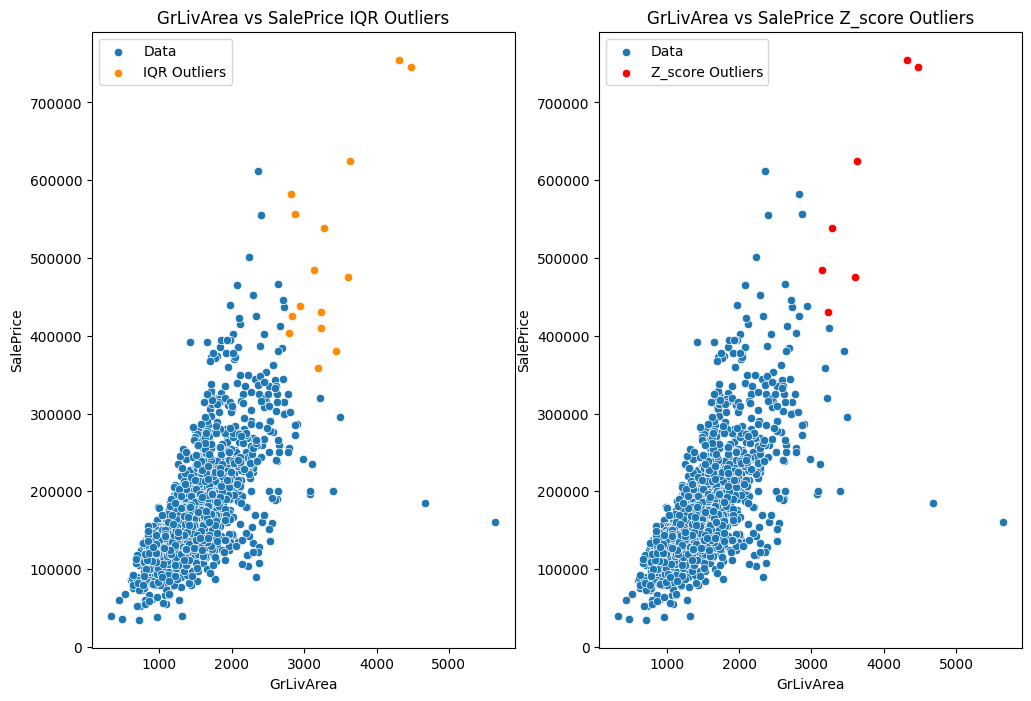

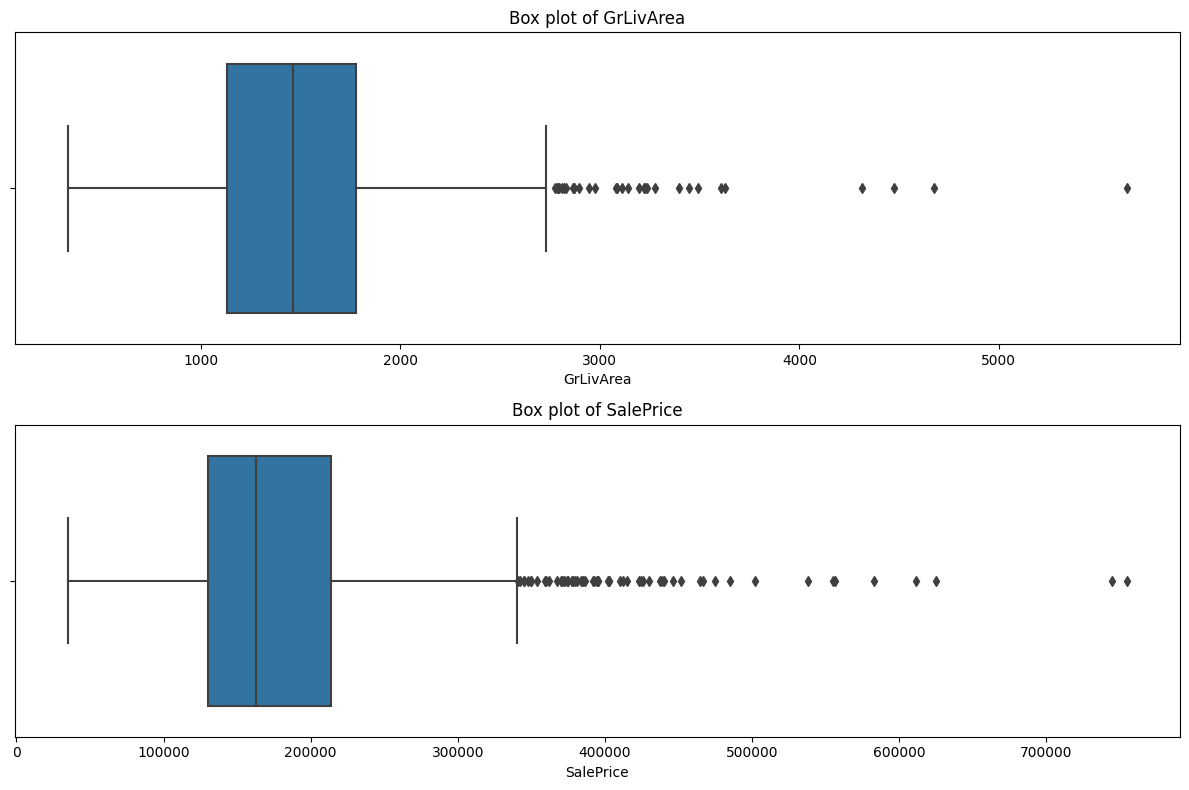

In [32]:
traditional_outlier_plotting(df, 'GrLivArea', 'SalePrice')

#### Advanced Outlier Visualization

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [34]:
def advanced_outlier_plotting(df,feature1, feature2):
    features = [feature1, feature2]
    plt.figure(figsize=(12, 8))
    fig, axs = plt.subplots(3,1, figsize=(12, 10))

    
    outliers_dbscan,X = get_DBSCAN(df,feature1,feature2)
    outliers_isolation_forest,X = isolation_forest(df,feature1,feature2)
    outliers_lof,X = lof(df,feature1,feature2)

    # Plot 1: DBSCAN
    axs[0].set_title(f"DBSCAN outliers for {feature1} and {feature2}")
    sns.scatterplot(x = X[feature1], y = X[feature2], label='Data', ax=axs[0]) 
    axs[0].scatter(outliers_dbscan[feature1], outliers_dbscan[feature2],
                       color='red', label='DBSCAN Outliers')

    # Plot 2: Isolation Forest
    axs[1].set_title(f"Isolation Forest outliers for {feature1} and {feature2}")
    sns.scatterplot(x = X[feature1], y = X[feature2], label='Data', ax=axs[1]) 
    axs[1].scatter(outliers_isolation_forest[feature1],
                       outliers_isolation_forest[feature2],
                       color='darkorange', label='Isolation Forest Outliers')
    
    # Plot 3: Local Outlier Factor
    axs[2].set_title(f"Local Outliers (LOF) for {feature1} and {feature2}")
    sns.scatterplot(x = X[feature1], y = X[feature2], label='Data', ax=axs[2]) 
    axs[2].scatter(outliers_lof[feature1],
                       outliers_lof[feature2],
                       color='yellow', label='LOF Outliers')

    plt.tight_layout()
    plt.show()



def get_DBSCAN(df, feature1,feature2):
    X = df[[feature1, feature2]].dropna()
    dbscan = DBSCAN(eps=1000, min_samples=5)
    labels = dbscan.fit_predict(X)
    outliers_dbscan = X[labels == -1]
    return outliers_dbscan, X

def isolation_forest(df,feature1, feature2):
    isolation_forest = IsolationForest(contamination=0.06, random_state=42)
    X = df[[feature1, feature2]].dropna()
    X['anomaly'] = isolation_forest.fit_predict(X)
    outliers = X[X['anomaly']==-1]
    return outliers, X
def lof(df,feature1, feature2):
    X = df[[feature1, feature2]].dropna()
    lof = LocalOutlierFactor(n_neighbors=20,contamination=0.05)
    pred = lof.fit_predict(X)
    outliers = X[pred == -1]
    return outliers,X
    
        
        

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

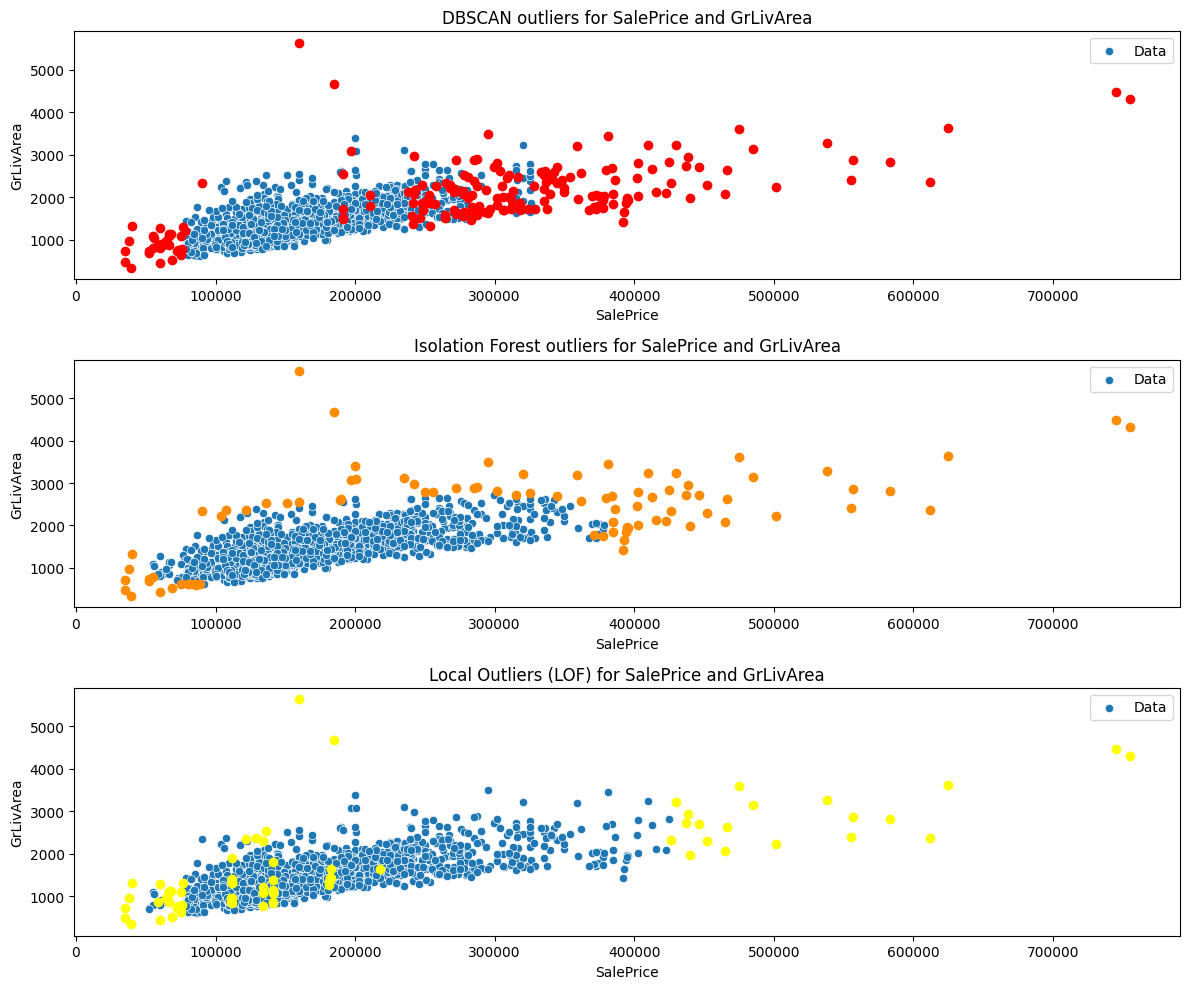

In [35]:
advanced_outlier_plotting(df,'SalePrice','GrLivArea')

## Data Transformation

Data transformation is the process of converting data into another strucuture suitable for model analysis or data visualization.

### Types of Data Transformation

#### Scaling and Normalization

1. Min-Max Scaling (Normalization): Scales all data from a range of [0-1]
    - useful when working with models that are sensitive to scales like distance-based models (KNN, SVM, Neural networks)
    - (Use-Case): Scaling an image's pixels between 0 and 1
    - MinMaxScaler from sklearn
2. Standardization: Centers data to have a mean = 0 and standard deviation = 1
    - useful for normally distributed data and models that thrive on this (linear regression)
    - (Use-Case): Standardizing heights and weights for regression
    - StandardScaler from sklearn
3. Robust Scaling: Uses median and IQR to reduce the impact of outliers on scaling whilst keeping the shape
    - X_scaled = (X - Median(X)) / IQR(X)
    - Ideal for models sensitive to scaling, like Linear models, SVM's or Neural networks

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [37]:
def scaled_plots(df, feature):

    num_df = df.select_dtypes(include = ['number'])
    plt.figure(figsize=(20,8))

    plt.subplot(1,4,1)
    sns.violinplot(x = feature, data = num_df, color = 'skyblue')
    plt.title(f"{feature} before any scaling")

    min_max = get_min_max(num_df, feature)
    standard = get_standard(num_df,feature)
    robust = get_robust(num_df, feature)

    plt.subplot(1,4,2)
    sns.violinplot(x = feature, data=min_max, color='orange')
    plt.title(f"{feature} after MinMax scaling")

    plt.subplot(1,4,3)
    sns.violinplot(x = feature, data=standard, color = 'purple')
    plt.title(f"{feature} after Standard scaling")

    plt.subplot(1,4,4)
    sns.violinplot(x = feature, data=robust, color = 'yellow')
    plt.title(f"{feature} after Robust Scaling scaling")


    plt.tight_layout()
    plt.show()

def get_min_max(df,feature):
    scaler = MinMaxScaler()

    scaled_data = scaler.fit_transform(df[[feature]])

    df_minmax = pd.DataFrame(scaled_data, columns=[feature])
    return df_minmax

def get_standard(df,feature):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[[feature]])

    df_standard = pd.DataFrame(scaled_data, columns = [feature])

    return df_standard

def get_robust(df, feature):
    scaler = RobustScaler()

    scaled_data = scaler.fit_transform(df[[feature]])
    df_robust = pd.DataFrame(scaled_data, columns= [feature])

    return df_robust

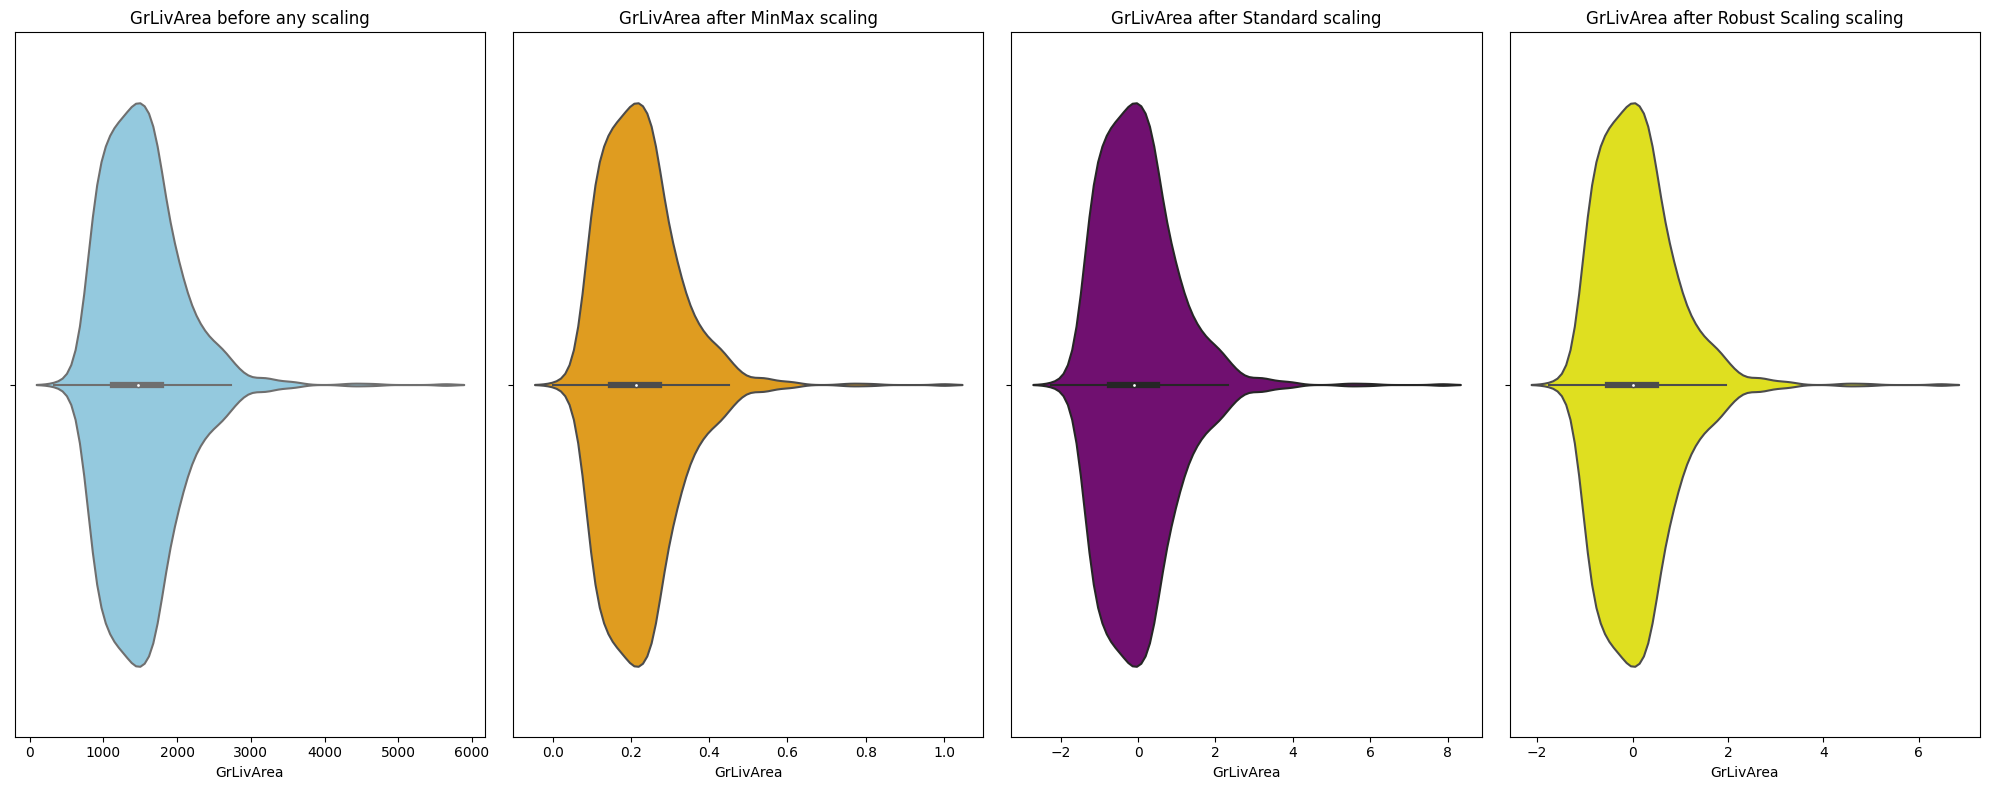

In [38]:
scaled_plots(df, 'GrLivArea')

#### Transformation

We've already gone through some of these transformations in the EDA notebook, but I will briefly go through them again 

1. Log Transformation
    - Applies a logarithm to all values, resulting in larger values being reduced.
    - Effective in transforming data with the right skewness
2. Square Root Transformation
   - Applies the square root to all values, resulting in larger values being reduced
3. Box-Cox Transformation
    - Applies a transformation by raising all data to the power of a hyperparameter lambda
    - Only works for data > 0
    - Useful for right-scaled data

In [39]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [40]:
def transform_data(df, feature):
    # Perform transforms
    log_transform = np.log1p(df[feature])
    sqrt_transform = np.sqrt(df[feature])
    boxcox_transform, lmbda = boxcox(df[feature])

    # Plot side by side
    plt.figure(figsize=(20, 6))

    # Original
    plt.subplot(1, 4, 1)
    sns.histplot(x = df[feature], kde=True, color='skyblue')
    plt.title(f'{feature} (original)')
    plt.text(0.7, 0.9, f'mean = {df[feature].mean():.2f}\nstd = {df[feature].std():.2f}',
              transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    

    # Log transform
    plt.subplot(1, 4, 2)
    sns.histplot(log_transform, kde=True, color = 'darkred')
    plt.title(f'{feature} (log transform)')
    plt.text(0.7, 0.9, f'mean = {log_transform.mean():.2f}\nstd = {log_transform.std():.2f}',
              transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    

    # Square root transform
    plt.subplot(1, 4, 3)
    sns.histplot(sqrt_transform, kde=True, color ='purple')
    plt.title(f'{feature} (square root transform)')
    plt.text(0.7, 0.9, f'mean = {sqrt_transform.mean():.2f}\nstd = {sqrt_transform.std():.2f}',
              transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    

    # BoxCox transform
    plt.subplot(1, 4, 4)
    sns.histplot(boxcox_transform, kde=True, color = 'orange')
    plt.title(f'{feature} (BoxCox transform)')
    plt.text(0.7, 0.9, f'mean = {boxcox_transform.mean():.2f}\nstd = {boxcox_transform.std():.2f}',
              transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

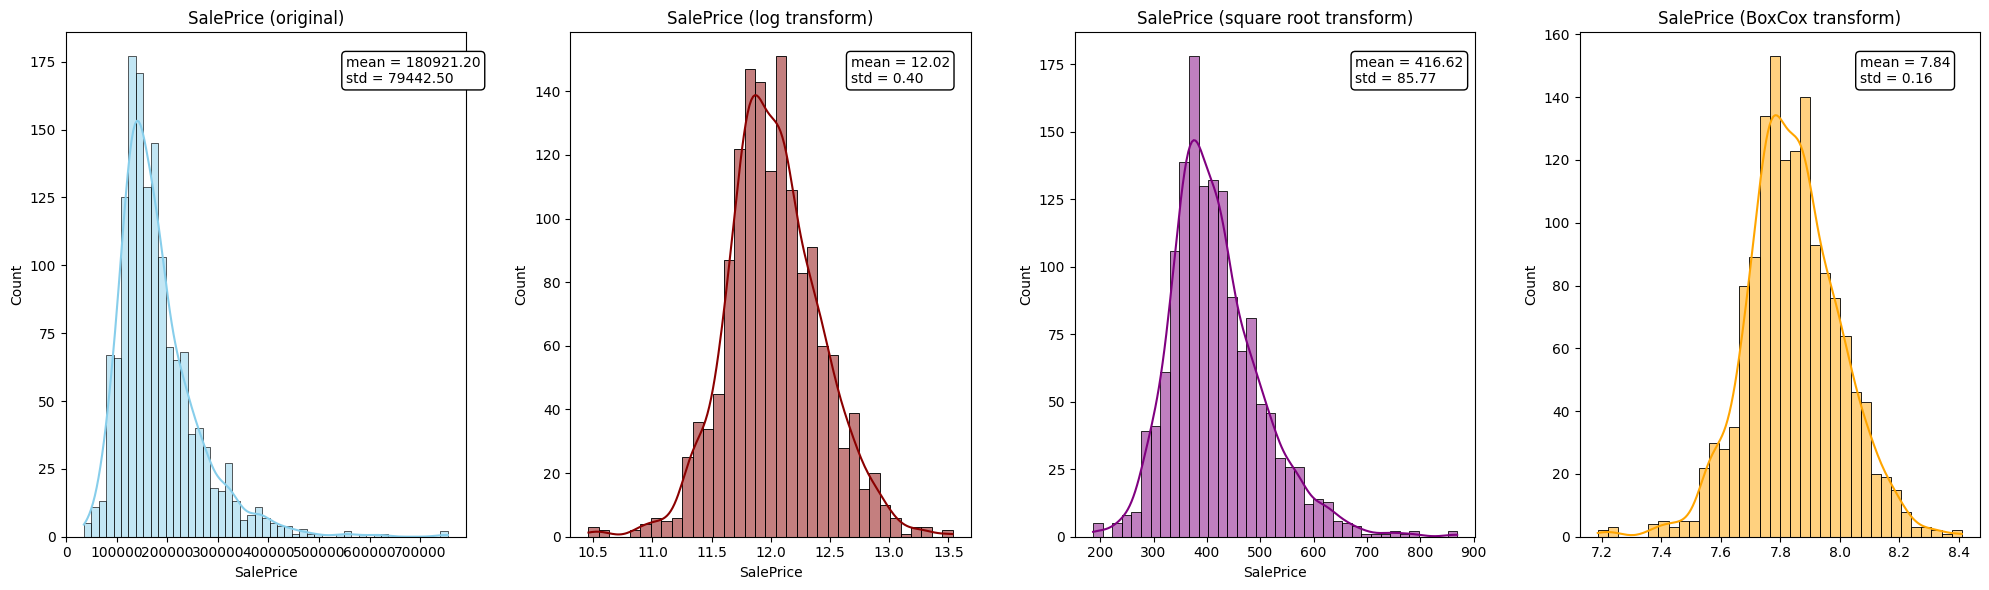

In [41]:
transform_data(df, 'SalePrice')

### Data Encoding

Data encoding is the process of converting categorical columns like age into a numerical format while still conveying the same meaning. This allows us to use ML models to learn non-numeric features

#### Types of Encoding

1. One-Hot Encoding: Creates Binary columns for each category
    - Best for categories where order doesn't matter
    - Not ideal for categories with many values, increasing dimensionality
2. Label Encoding: Assigns a unique value for each category
    - This introduces an arbitrary ordering, which may accidentally convey importance to some ML algorithms
    - Useful for a category like colour, containing values: red, blue,green, etc
3. Ordinal Encoding: Encodes categories in a manner where order is important
    - low < medium < large is where this would be useful


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [43]:
cat_df = df.select_dtypes(include = ['object'])
cat_df.dropna(axis = 1,inplace = True)

In [44]:
cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### One Hot Encoding

As mentioned above, one hot encoding is ideal for categoric columns which contain low dimesionality, and the values arent ordinal (one of clear ranking)


In [45]:
cat_df['LotShape'].unique()
# This will serve as a good column to preform One Hot Encoding on

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [46]:
# Initialize the encoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Perform transformation
one_hot_encoded_data = one_hot_encoder.fit_transform(cat_df[['LotShape']])

# Retrieve the new column names
new_columns = one_hot_encoder.get_feature_names_out(['LotShape'])

# Create a DataFrame with the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded_data, columns=new_columns, index=cat_df.index)

# Combine back with the main DataFrame
cat_df = pd.concat([cat_df.drop('LotShape', axis=1), one_hot_df], axis=1)

cat_df


,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,RL,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0
1,RL,Pave,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Y,TA,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0
2,RL,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0
3,RL,Pave,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Abnorml,1.0,0.0,0.0,0.0
4,RL,Pave,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,TA,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0
1456,RL,Pave,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,Y,TA,Min1,Y,WD,Normal,0.0,0.0,0.0,1.0
1457,RL,Pave,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0
1458,RL,Pave,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Y,Gd,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0


#### Label Encoding

Ideal for nominal columns with many unique values

In [47]:
cat_df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [48]:
label = LabelEncoder()

label_encoded_data = label.fit_transform(cat_df['KitchenQual'])

label_encoded_df = pd.DataFrame(label_encoded_data, columns=['KitchenQual_Label_Enocded'], index = cat_df.index)

cat_df = pd.concat([cat_df.drop('KitchenQual', axis = 1),label_encoded_df], axis = 1)

cat_df

,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,CentralAir,Functional,PavedDrive,SaleType,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Label_Enocded
0,RL,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2
1,RL,Pave,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Y,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,3
2,RL,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0,2
3,RL,Pave,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Abnorml,1.0,0.0,0.0,0.0,2
4,RL,Pave,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,3
1456,RL,Pave,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,Y,Min1,Y,WD,Normal,0.0,0.0,0.0,1.0,3
1457,RL,Pave,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2
1458,RL,Pave,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Y,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2


#### Ordinal Encoding

Ordinal encoding is ideal for ordinal columns

In [49]:
cat_df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

Here ordinal encoding would be ideal since there is a natural order
- low < bnk < level < hill

In [50]:
cat_df['LandContour'].index

RangeIndex(start=0, stop=1460, step=1)

In [51]:
ordinal = OrdinalEncoder(categories=[['Low','Bnk','Lvl','HLS']])

ordinal_data = ordinal.fit_transform(cat_df[['LandContour']])

ordinal_df = pd.DataFrame(ordinal_data, columns=['LandContour_Ordinal_Encoded'], index=cat_df.index)

cat_df = pd.concat([cat_df.drop('LandContour', axis = 1),ordinal_df], axis = 1)

cat_df

,MSZoning,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Functional,PavedDrive,SaleType,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,KitchenQual_Label_Enocded,LandContour_Ordinal_Encoded
0,RL,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2,2.0
1,RL,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,3,2.0
2,RL,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0,2,2.0
3,RL,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Abnorml,1.0,0.0,0.0,0.0,2,2.0
4,RL,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Normal,1.0,0.0,0.0,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,3,2.0
1456,RL,Pave,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Min1,Y,WD,Normal,0.0,0.0,0.0,1.0,3,2.0
1457,RL,Pave,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2,2.0
1458,RL,Pave,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Typ,Y,WD,Normal,0.0,0.0,0.0,1.0,2,2.0
